Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
RMSE after 10 training steps is [0.06155502]
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
RMSE after 20 training steps is [0.06588412]
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
Used batch_size will be: 100
RMSE after 

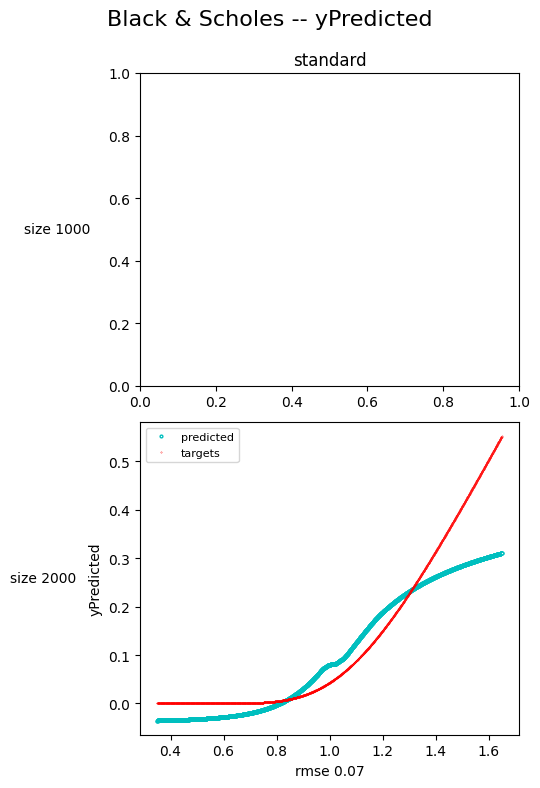

In [2]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())
### - dataSeed = seed for simulations or (for csv input) for randomization of csv
dataSeed = 1 
weightSeed = 1 


###
### 1. Training data
###
### - First option: use generation class that computes training data during training
### - Second option: use csv sheet

generator = BlackScholes()
#sizes = [750, 7500] # training set sizes. Performed one after the other and might be compared

#generator = DataImporter('C:/dev/MonteCarloLearning/src/BlackScholes/data/training1dimDataImpliedVolatility10E5.csv')
sizes = [1000,2000] # [sizePerTrainingStep, trainingSteps]
nTest = 2000 # Test set size


###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 40                  # we use equal neurons for each hidden layer
hiddenLayers = 2                    # amount of hidden layers
activationFunctionsHidden = tf.nn.tanh   # activation functions of hidden layers
###
### 3. Train network
###
trainingMethod = TrainingMethod.GenerateDataDuringTraining

xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod)
    
###
### 3. Study results
###   

# show predicitions
plot_results("Black & Scholes", yPredicted, xTest, "test inputs", "yPredicted", yTest, sizes, True, False, None, trainingMethod)